# Project III - Home Credit Default Risk

You've been learning a lot about Machine Learning Algorithms, now we you're gonna be asked to put it all together. 

You will create a complete pipeline to preprocess the data, train your model and then predict values for the [Home Credit Default Risk](https://www.kaggle.com/competitions/home-credit-default-risk/) Kaggle competition.

## Introduction

Kaggle is a web platform and community for data scientist and machine learning engineers where competetitions and datasets are regularly published.

This particular competition is a binary Classification task: we want to predict whether the person applying for a home credit will be able to repay its debt or not. The competition finished 4 years ago, so you will find a lot of blog posts and code written for it, we encourage you to read everything you can about it.

The dataset is composed of multiple files with different information about loands taken. In this project we're going to exclusively work with the main files: application_train.csv and application_test.csv.

The competition uses [Area Under the ROC Curve](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=es_419) as the evaluation metric, so our models will have to return the probabilities that a loan is not paid for each row.

### Getting the data

1- Login to Kaggle (if you don't have an account you'll have to register to get it) and download the [complete dataset](https://www.kaggle.com/competitions/home-credit-default-risk/data). Read the information about the data. What does a row in the main file represent? What does the target variable means?

One row represents one loan in our data sample.
The target variable says wether the loan was repaid (0) or not (1)

2- Load the training and test datasets, we're only going to work withe "application_train.csv" and "application_test.csv" for now

In [7]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
import lightgbm as lgb

warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
### Complete in this cell: Loading the dataset
applications_train = pd.read_csv(
    '/content/drive/MyDrive/AnyoneAI/Sprint 3/application_train.csv')
applications_test = pd.read_csv(
    '/content/drive/MyDrive/AnyoneAI/Sprint 3/application_test.csv')

### Exploratory Data Analysis

A lot of the analysis of the data can be found on public available Kaggle kernels or blog posts, but you need to make sure you understand the datasets properties before starting working on it, so we'll do exploratory data analysis for the main files

**Dataset Basics**

In [ ]:
print(f'Shape: {applications_train.shape}')
print(f'Shape: {applications_test.shape}')

Shape: (307511, 122)
Shape: (48744, 121)


2- List all columns in the train dataset

In [ ]:
print(applications_train.columns.values)

['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRANCES_AVG' 'FLOOR

In [ ]:
pd.set_option('display.max_rows', 200)
applications_train.head().T

,0,1,2,3,4
SK_ID_CURR,100002,100003,100004,100006,100007
TARGET,1,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M
FLAG_OWN_CAR,N,N,Y,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,202500.0,270000.0,67500.0,135000.0,121500.0
AMT_CREDIT,406597.5,1293502.5,135000.0,312682.5,513000.0
AMT_ANNUITY,24700.5,35698.5,6750.0,29686.5,21865.5


## Target distribution

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

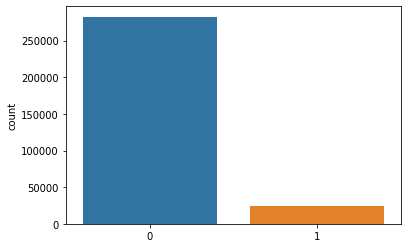

In [ ]:
sns.countplot(data=applications_train, x=applications_train['TARGET'].values)
applications_train['TARGET'].value_counts() / len(applications_train)

## Data Types

In [ ]:
applications_train.columns.to_series().groupby(
    applications_train.dtypes).count()

int64      41
float64    65
object     16
dtype: int64

## Values in categorical features

In [ ]:
categorical_feature = applications_train.select_dtypes(
    exclude=['int', 'float'])
categorical_feature.nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

## Nans

In [ ]:
### Complete in this cell: checking missing data
percent_missing = applications_train.isnull().sum() * 100 / len(
    applications_train)
percent_missing.nlargest(20)

COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_MEDI             69.872297
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_MEDI       68.354953
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_AVG             66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_MEDI            66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_AVG                59.376738
LANDAREA_MODE               59.376738
LANDAREA_MEDI               59.376738
dtype: float64

**Analyzing distribution of variables**

,AMT_CREDIT
count,3.075110e+05
mean,5.990260e+05
std,4.024908e+05
min,4.500000e+04
25%,2.700000e+05
50%,5.135310e+05
75%,8.086500e+05
max,4.050000e+06


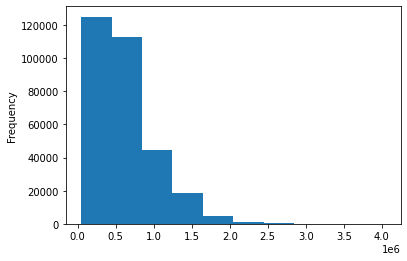

In [ ]:
applications_train['AMT_CREDIT'].plot.hist()
applications_train[['AMT_CREDIT']].describe()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

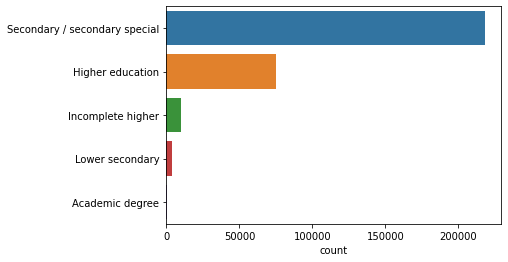

In [ ]:
sns.countplot(data=applications_train,
              y=applications_train['NAME_EDUCATION_TYPE'].values)
applications_train['NAME_EDUCATION_TYPE'].value_counts()

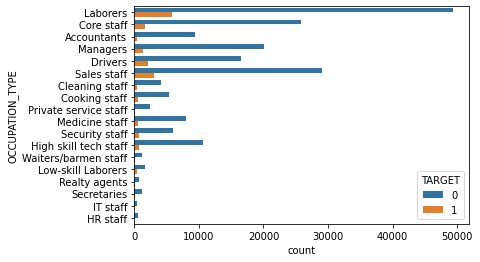

In [ ]:
sns.countplot(y=applications_train['OCCUPATION_TYPE'],
              hue=applications_train['TARGET'])

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

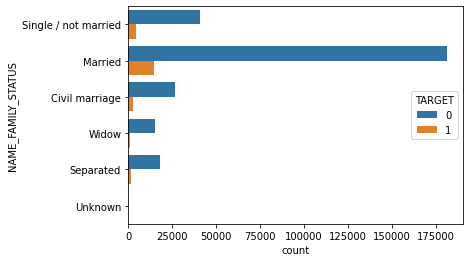

In [ ]:
sns.countplot(y=applications_train['NAME_FAMILY_STATUS'],
              hue=applications_train['TARGET'])
applications_train['NAME_FAMILY_STATUS'].value_counts()

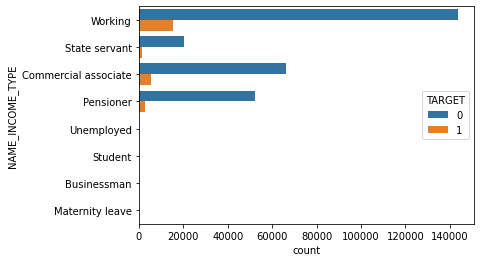

In [ ]:
sns.countplot(y=applications_train['NAME_INCOME_TYPE'],
              hue=applications_train['TARGET'])

## Preprocessing

In this section, you will code a function to make all the data pre processing for the dataset. What you have to deliver is a function that takes the train and test dataframes, processes all features, and returns the transformed data as numpy arrays ready to be used for training.

In [9]:
def apply_preprocessing(train, test):
    train_raw = train.copy()
    test_raw = test.copy()
    # Label Encoding
    categories_to_label = [
        'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'
    ]
    label_enc = LabelEncoder()
    for column in categories_to_label:
        label_enc.fit(train_raw[column])
        train_raw[column] = label_enc.transform(train_raw[column])
        test_raw[column] = label_enc.transform(test_raw[column])
    # Hot Encoding
    train_raw = pd.get_dummies(train_raw)
    test_raw = pd.get_dummies(test_raw)
    # Saving y_train
    y_train = train_raw['TARGET']
    # Getting same amount of feature
    train_raw, test_raw = train_raw.align(test_raw, join='inner', axis=1)
    # Some bad imputs
    train_raw['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)
    test_raw['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)
    #Create imputer and scaler
    imputer = SimpleImputer(strategy='median')
    std_scaler = StandardScaler()
    # Impute data
    imputer.fit(train_raw)
    train_raw = imputer.transform(train_raw)
    test_raw = imputer.transform(test_raw)
    # Scale data
    std_scaler.fit(train_raw)
    train_raw = std_scaler.transform(train_raw)
    test_raw = std_scaler.transform(test_raw)
    return train_raw, test_raw, y_train

In [10]:
X_train, X_test, y_train = apply_preprocessing(applications_train,
                                               applications_test)

## Training Models

As usual, you will start training simple models and will progressively move to more complex models and pipelines.

### Baseline: LogisticRegression

In [11]:
log_reg = LogisticRegression(random_state=1, C=0.0001)
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.0001, random_state=1)

In [12]:
def get_submission(name, model, test):
    """
    Receives a string and a model
    Predicts probabilities if the applicant will have problems repaying his debt.
    Creates a csv called with the name variable.
    """
    y_proba = model.predict_proba(test)[:, 1]
    submission = applications_test[['SK_ID_CURR']]
    submission['TARGET'] = y_proba
    submission.to_csv(f'{name}.csv', index=False)
    print(f'Csv {name} createad')

In [13]:
get_submission('logistic_regresion', log_reg, X_test)
print(f'Private Score:0.73016, public score: 0.73303')

Csv logistic_regresion createad
Private Score:0.73016, public score: 0.73303


### Training a Random Forest Classifier 

In [14]:
random_forest = RandomForestClassifier(n_jobs=-1, random_state=5)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=5)

In [15]:
### Complete in this cell: predict test data and save csv
get_submission('RandomForest', random_forest, X_test)

Csv random_forest createad


In [16]:
### Complete in this cell: report your score on Kaggle
# This model should have a private score around 0.68
print(f'Private Score:0.69349, public score: 0.6959')

Private Score:0.69349, public score: 0.6959


### Randomized Search with Cross Validation

So far, we've only created models using the default hyperparameters of each algorithm. This is usually something that we would only do for baseline models, hyperparameter tuning is a very important part of the modeling process and is often the difference between having an acceptable model or not.

But, there are usually lots of hyperparameters to tune and a finite amount of time to do it, you have to consider the time and resources it takes to find an optimal combination of them. In the previous section you trained a random forest classifier and saw how much it took to train it once in your PC. If you want to do hyperparameter optimization you now have to consider that you will have to train the algorithm N number of times, with N being the cartesian product of all parameters. 

Furthermore, you can't validate the performance of your trained models on the test set, as this data should only be used to validate the final model. So we have to implement a validation strategy, K-Fold Cross Validation being the most common. But this also adds time complexity to our training, because we will have to train each combinations of hyperparameters M number of times, X being the number of folds in which we divided our dataset, so the total number of training iterations will be NxM... this resulting number can grow VERY quickly.

Fortunately there are strategies to mitigate this, here you're going to select a small number of hyperparameters to test a RandomForestClassifier, and use a Randomized Search algorithm with K-Fold Cross Validation to avoid doing a full search across the grid. 

Remember: take in consideration how much time it took to train a single classifier, and define the number of cross validations folds and iterations of the search accordingly. 
A recommendation: run the training process, go make yourself a cup of coffee, sit somewhere comfortably and forget about it for a while.


1- Use RandomizedSearchCV to find the best combination of hyperparameters for a RandomForestClassifier. The validation metric used to evaluate the models should be "roc_auc".

In [ ]:
### Complete in this cell: Use RandomizedSearchCV to find the best combination of hyperparameters for a RandomForestClassifier
example_hyperparameter_grid = {
 'bootstrap': [True, False],
 'max_depth': [10, 50, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200]
}

In [ ]:
random_forest = RandomForestClassifier(n_jobs=-1, random_state=1)
randomize_forest = RandomizedSearchCV(random_forest, example_hyperparameter_grid,random_state=7, n_iter=10, cv=3, n_jobs=-1, verbose=3)

In [ ]:
best_model = randomize_forest.fit(X_train, y_train)
best_model.best_estimator_.get_params()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

2- Use the classifier to predict probabilities on the test set, and save the results to a csv file.

In [ ]:
### Complete in this cell: predict test data and save csv
get_submission('RandomizedSearch', best_model, X_test)

Csv RandomizedSearch createad


3- Load the predictions to the competition. Report the private score here.

In [ ]:
### Complete in this cell: report your score on Kaggle
# This model should have a private score around 0.70 
print(f'Private Score:0.72021, public score: 0.71834')

Private Score:0.72021, public score: 0.71834


4- If you have the time and resources, you can train the model for longer iterations, or select more estimator sizes. This is optional, but if you, we would love to see your results.

### Optional: Training a LightGBM model 

Gradient Boosting Machine is one of the most used machine learning algorithms for tabular data. Lots of competitions have been won using models from libraries like XGBoost or LightGBM. You can try using [LightGBM](https://lightgbm.readthedocs.io/en/latest/) to train a new model an see how it performs compared to the other classifiers you trained. 

In [ ]:
### Complete in this cell: train a LightGBM model
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
randomize_lightgbm = RandomizedSearchCV(lgb_model, example_hyperparameter_grid,random_state=10, n_iter=25, cv=3,n_jobs=-1,verbose=3)

In [ ]:
best_lightgbm = randomize_lightgbm.fit(X_train, y_train)
get_submission('LightGBMClassifier', best_lightgbm, X_test)
print(f'Private Score:0.74374, public score: 0.74467')

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Csv LightGBMClassifier createad
Private Score:0.74374, public score: 0.74467


### Optional: Using Scikit Learn Pipelines 

So far you've created special functions or blocks or code to chain operations on data and then train the models. But, reproducibility is important, and you don't want to have to remember the correct steps to follow each time you have new data to train your models. There are a lots of tools out there that can help you with that, here you can use a [Sklearn Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to process your data.

In [3]:
### Complete in this cell: use a sklearn Pipeline to automate the cleaning, standardizing and training 

binary_categories= ["NAME_CONTRACT_TYPE",
"CODE_GENDER",
"FLAG_OWN_CAR",
"FLAG_OWN_REALTY",
"EMERGENCYSTATE_MODE"]

not_binary_categories=["NAME_TYPE_SUITE",
"NAME_INCOME_TYPE",
"NAME_EDUCATION_TYPE",
"NAME_FAMILY_STATUS",
"NAME_HOUSING_TYPE",
"OCCUPATION_TYPE",
"WEEKDAY_APPR_PROCESS_START",
"ORGANIZATION_TYPE",
"FONDKAPREMONT_MODE",
"HOUSETYPE_MODE",
"WALLSMATERIAL_MODE",]

int_categories = ["FLAG_MOBIL",
"FLAG_EMP_PHONE",
"FLAG_WORK_PHONE",
"FLAG_CONT_MOBILE",
"FLAG_PHONE",
"FLAG_EMAIL",
"REG_REGION_NOT_LIVE_REGION",
"REG_REGION_NOT_WORK_REGION",
"LIVE_REGION_NOT_WORK_REGION",
"REG_CITY_NOT_LIVE_CITY",
"REG_CITY_NOT_WORK_CITY",
"LIVE_CITY_NOT_WORK_CITY",
"FLAG_DOCUMENT_2",
"FLAG_DOCUMENT_3",
"FLAG_DOCUMENT_4",
"FLAG_DOCUMENT_5",
"FLAG_DOCUMENT_6",
"FLAG_DOCUMENT_7",
"FLAG_DOCUMENT_8",
"FLAG_DOCUMENT_9",
"FLAG_DOCUMENT_10",
"FLAG_DOCUMENT_11",
"FLAG_DOCUMENT_12",
"FLAG_DOCUMENT_13",
"FLAG_DOCUMENT_14",
"FLAG_DOCUMENT_15",
"FLAG_DOCUMENT_16",
"FLAG_DOCUMENT_17",
"FLAG_DOCUMENT_18",
"FLAG_DOCUMENT_19",
"FLAG_DOCUMENT_20",
"FLAG_DOCUMENT_21"]

numeric_columns = ["CNT_CHILDREN",
"AMT_INCOME_TOTAL",
"AMT_CREDIT",
"AMT_ANNUITY",
"AMT_GOODS_PRICE",
"DAYS_BIRTH",
"DAYS_EMPLOYED",
"DAYS_REGISTRATION",
"DAYS_ID_PUBLISH",
"OWN_CAR_AGE",
"CNT_FAM_MEMBERS",
"REGION_RATING_CLIENT",
"REGION_RATING_CLIENT_W_CITY",
"HOUR_APPR_PROCESS_START",
"OBS_30_CNT_SOCIAL_CIRCLE",
"DEF_30_CNT_SOCIAL_CIRCLE",
"OBS_60_CNT_SOCIAL_CIRCLE",
"DEF_60_CNT_SOCIAL_CIRCLE",
"DAYS_LAST_PHONE_CHANGE",
"AMT_REQ_CREDIT_BUREAU_HOUR",
"AMT_REQ_CREDIT_BUREAU_DAY",
"AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_MON",
"AMT_REQ_CREDIT_BUREAU_QRT",
"AMT_REQ_CREDIT_BUREAU_YEAR"]

normalized = ['EXT_SOURCE_1',
'EXT_SOURCE_2',
'EXT_SOURCE_3',
'APARTMENTS_AVG',
'BASEMENTAREA_AVG',
'YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BUILD_AVG',
'COMMONAREA_AVG',
'ELEVATORS_AVG',
'ENTRANCES_AVG',
'FLOORSMAX_AVG',
'FLOORSMIN_AVG',
'LANDAREA_AVG',
'LIVINGAPARTMENTS_AVG',
'LIVINGAREA_AVG',
'NONLIVINGAPARTMENTS_AVG',
'NONLIVINGAREA_AVG',
'APARTMENTS_MODE',
'BASEMENTAREA_MODE',
'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BUILD_MODE',
'COMMONAREA_MODE',
'ELEVATORS_MODE',
'ENTRANCES_MODE',
'FLOORSMAX_MODE',
'FLOORSMIN_MODE',
'LANDAREA_MODE',
'LIVINGAPARTMENTS_MODE',
'LIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_MODE',
'NONLIVINGAREA_MODE',
'APARTMENTS_MEDI',
'BASEMENTAREA_MEDI',
'YEARS_BEGINEXPLUATATION_MEDI',
'YEARS_BUILD_MEDI',
'COMMONAREA_MEDI',
'ELEVATORS_MEDI',
'ENTRANCES_MEDI',
'FLOORSMAX_MEDI',
'FLOORSMIN_MEDI',
'LANDAREA_MEDI',
'LIVINGAPARTMENTS_MEDI',
'LIVINGAREA_MEDI',
'NONLIVINGAPARTMENTS_MEDI',
'NONLIVINGAREA_MEDI',
'TOTALAREA_MODE',
'REGION_POPULATION_RELATIVE']



In [17]:
### Complete in this cell: use a sklearn Pipeline to automate the cleaning, standardizing and training 
train = applications_train.copy()
test = applications_test.copy()

# Replace XNA for most_frequent manually.
train['CODE_GENDER'] = train.CODE_GENDER.str.replace("XNA", "F")
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
y_train = train['TARGET']
train = train.drop('TARGET',axis=1)
train = train.drop('SK_ID_CURR',axis=1)
test = test.drop('SK_ID_CURR',axis=1)

# numeric_columns
numeric_columns_transform = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='median')),
      ('scaler',  StandardScaler())
])
# numeric columns that are already normalized.
normalized_columns_transform = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='median')),
      ('scaler',  MinMaxScaler())
])

# not_binary_categories --- > more than two labels
not_binary_categories_transform = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='most_frequent')),                                  
       ('encoder', OneHotEncoder(sparse = False)),
      ('scaler',  StandardScaler())
])

# binary_categories --- > two labels
binary_categories_transform = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='most_frequent')),                                  
       ('encoder', OneHotEncoder(sparse = False)),
      ('scaler',  StandardScaler())
])

# binary_int_categories --- > 0 1
int_categories_transform = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='most_frequent')),
      ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_columns_transform, numeric_columns),
   ('not_binary_categorical', not_binary_categories_transform, not_binary_categories),
   ('binary_categorical', binary_categories_transform, binary_categories),
   ('int_categories', int_categories_transform, int_categories),
   ('normalized', normalized_columns_transform, normalized),
]) 

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('light', lgb.LGBMClassifier())
           ])

pipeline_model = pipeline.fit(train, y_train)
get_submission('Pipelinemodel', pipeline_model, test)
print(f'Private Score:0.74449, public score: 0.74428')

Csv Pipelinemodel createad
Private Score:0.74449, public score: 0.74428
